>## Convert kml point to string

In [0]:
!pip install geopandas
!pip install folium

     |████████████████████████████████| 921kB 4.7MB/s 
     |████████████████████████████████| 10.1MB 34.4MB/s 
     |████████████████████████████████| 11.8MB 197kB/s 


In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving linkedin_connections.json to linkedin_connections.json
User uploaded file "linkedin_connections.json" with length 156544 bytes


In [0]:
!ls

connections.kml  linkedin_connections.json  sample_data


In [102]:
import geopandas as gpd
import matplotlib.pyplot as plt
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

# Filepath to KML file
fp = "connections.kml"

polys = gpd.read_file(fp, driver='KML')
polys[0:10]

,Name,Description,geometry
0,Paul Morgan,,POINT Z (-95.96527929999999 36.0621451 0)
1,Charles Brown,,POINT Z (-118.919964 34.1919771 0)
2,Cecil Raines,,POINT Z (-96.8333109 32.9491097 0)
3,William Sherwood,,POINT Z (-82.53909 27.3351476 0)
4,Freddie Gaylord,,POINT Z (-83.64921 41.036057 0)
5,Doug Lambino,,POINT Z (-93.0968087 44.94711940000001 0)
6,Kelly Haddix,,POINT Z (-82.5509302 36.5354221 0)
7,Cynthia Tenneson,,POINT Z (-84.35300149999999 33.9370911 0)
8,Bill Jackson,,POINT Z (-95.99334789999999 36.1572487 0)
9,Curtis Carnell,,POINT Z (-68.76934539999999 44.8020782 0)


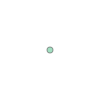

In [2]:
polys['geometry'][0]

In [3]:
import pandas as pd

tmp_df = pd.DataFrame(columns=['Name', 'geometry'])
tmp_df['Name'] = polys["Name"]
tmp_df['geometry'] = polys["geometry"]
df_x = tmp_df['geometry'].apply(lambda p: p.x)
df_y = tmp_df['geometry'].apply(lambda p: p.y)
tmp_df['x'] = df_x
tmp_df['y'] = df_y
tmp_df = tmp_df.drop(columns=['geometry'])
tmp_df.head()

,Name,x,y
0,Paul Morgan,-95.965279,36.062145
1,Charles Brown,-118.919964,34.191977
2,Cecil Raines,-96.833311,32.949110
3,William Sherwood,-82.539090,27.335148
4,Freddie Gaylord,-83.649210,41.036057


> ## K-Means Clustering and Visualization

In [101]:
import json
tmp_json = json.loads(open('linkedin_connections.json').read())
tmp_json[0:3]

[{'FirstName': 'Kenneth',
  'LastName': 'Isaac',
  'EmailAddress': 'kennethisaac@fakemail.com',
  'Company': 'Parker-Hannifin',
  'Position': ['Agricultural Technician'],
  'ConnectedOn': '7/4/2007',
  'Tags': '',
  'Location': None},
 {'FirstName': 'Janina',
  'LastName': 'Prechtl',
  'EmailAddress': 'janinaprechtl@fakemail.com',
  'Company': 'The Clorox Company',
  'Position': ['Warehouse Stock Clerk'],
  'ConnectedOn': '8/10/2004',
  'Tags': '',
  'Location': None},
 {'FirstName': 'Paul',
  'LastName': 'Morgan',
  'EmailAddress': 'paulmorgan@fakemail.com',
  'Company': 'Juniper Networks',
  'Position': ['Factory Layout Engineer'],
  'ConnectedOn': '12/10/2015',
  'Tags': '',
  'Location': '1831 E 71st St, Tulsa, OK 74136, USA',
  'Lat': 36.0621451,
  'Lon': -95.96527929999999}]

In [5]:
tmp_raw = pd.read_json('linkedin_connections.json')
tmp_raw.head()

,FirstName,LastName,EmailAddress,Company,Position,ConnectedOn,Tags,Location,Lat,Lon
0,Kenneth,Isaac,kennethisaac@fakemail.com,Parker-Hannifin,[Agricultural Technician],7/4/2007,,None,NaN,NaN
1,Janina,Prechtl,janinaprechtl@fakemail.com,The Clorox Company,[Warehouse Stock Clerk],8/10/2004,,None,NaN,NaN
2,Paul,Morgan,paulmorgan@fakemail.com,Juniper Networks,[Factory Layout Engineer],12/10/2015,,"1831 E 71st St, Tulsa, OK 74136, USA",36.062145,-95.965279
3,Charles,Brown,charlesbrown@fakemail.com,Amgen Inc,[Chemical Equipment Operator],8/16/2004,,"1 Amgen Center Dr, Thousand Oaks, CA 91320, USA",34.191977,-118.919964
4,Mary,Ramirez,maryramirez@fakemail.com,CMS Energy,[Nuclear Medicine Technologist],8/24/2003,,None,NaN,NaN


In [6]:
tmp_raw['Name'] = tmp_raw['FirstName']+' '+tmp_raw['LastName']
tmp_raw.head()

,FirstName,LastName,EmailAddress,Company,Position,ConnectedOn,Tags,Location,Lat,Lon,Name
0,Kenneth,Isaac,kennethisaac@fakemail.com,Parker-Hannifin,[Agricultural Technician],7/4/2007,,None,NaN,NaN,Kenneth Isaac
1,Janina,Prechtl,janinaprechtl@fakemail.com,The Clorox Company,[Warehouse Stock Clerk],8/10/2004,,None,NaN,NaN,Janina Prechtl
2,Paul,Morgan,paulmorgan@fakemail.com,Juniper Networks,[Factory Layout Engineer],12/10/2015,,"1831 E 71st St, Tulsa, OK 74136, USA",36.062145,-95.965279,Paul Morgan
3,Charles,Brown,charlesbrown@fakemail.com,Amgen Inc,[Chemical Equipment Operator],8/16/2004,,"1 Amgen Center Dr, Thousand Oaks, CA 91320, USA",34.191977,-118.919964,Charles Brown
4,Mary,Ramirez,maryramirez@fakemail.com,CMS Energy,[Nuclear Medicine Technologist],8/24/2003,,None,NaN,NaN,Mary Ramirez


In [15]:
tmp_data = tmp_raw[tmp_raw.isnull()['Lat'] == False]
tmp_data.head()

,FirstName,LastName,EmailAddress,Company,Position,ConnectedOn,Tags,Location,Lat,Lon,Name
2,Paul,Morgan,paulmorgan@fakemail.com,Juniper Networks,[Factory Layout Engineer],12/10/2015,,"1831 E 71st St, Tulsa, OK 74136, USA",36.062145,-95.965279,Paul Morgan
3,Charles,Brown,charlesbrown@fakemail.com,Amgen Inc,[Chemical Equipment Operator],8/16/2004,,"1 Amgen Center Dr, Thousand Oaks, CA 91320, USA",34.191977,-118.919964,Charles Brown
5,Cecil,Raines,cecilraines@fakemail.com,Qorvo,[Clinical Psychologist],9/26/2005,,"14460 Qorvo Dr, Farmers Branch, TX 75244, USA",32.949110,-96.833311,Cecil Raines
7,William,Sherwood,williamsherwood@fakemail.com,PNC Financial Services,[Building Inspector],2/9/2009,,"1549 Ringling Blvd, Sarasota, FL 34236, USA",27.335148,-82.539090,William Sherwood
8,Freddie,Gaylord,freddiegaylord@fakemail.com,Marathon Petroleum,[Medical Records Technician],5/25/2003,,"539 S Main St, Findlay, OH 45840, USA",41.036057,-83.649210,Freddie Gaylord


In [16]:
tmp_data.isnull().sum()

FirstName       0
LastName        0
EmailAddress    0
Company         0
Position        0
ConnectedOn     0
Tags            0
Location        0
Lat             0
Lon             0
Name            0
dtype: int64

In [19]:
tmp_df = tmp_data[['Lat', 'Lon', 'Name', 'Company', 'Position']]
tmp_df.head()

,Lat,Lon,Name,Company,Position
2,36.062145,-95.965279,Paul Morgan,Juniper Networks,[Factory Layout Engineer]
3,34.191977,-118.919964,Charles Brown,Amgen Inc,[Chemical Equipment Operator]
5,32.949110,-96.833311,Cecil Raines,Qorvo,[Clinical Psychologist]
7,27.335148,-82.539090,William Sherwood,PNC Financial Services,[Building Inspector]
8,41.036057,-83.649210,Freddie Gaylord,Marathon Petroleum,[Medical Records Technician]


In [79]:
import folium
width, height = 650, 500
m = folium.Map(location=[38.899459, -104.862465], zoom_start=5,
                    tiles='OpenStreetMap', width=width, height=height)

In [80]:
m

In [81]:
tmp_string = list(tmp_df['Name'])[i]

for i in range(len(tmp_df)):
    folium.Marker(
      location=[list(tmp_df['Lat'])[i], list(tmp_df['Lon'])[i]],
      popup=list(tmp_df['Name'])[i],
      icon=folium.Icon(color='red',icon='star')
    ).add_to(m)

In [82]:
m

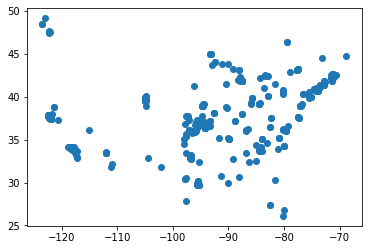

In [84]:
import matplotlib.pyplot as plt
plt.scatter(tmp_df['Lon'], tmp_df['Lat'])

[[ -83.14675228   37.05596545]
 [-122.7377303    48.04009314]
 [ -96.23377765   31.00569521]
 [-110.84901911   33.01468661]
 [-120.17379592   36.03318932]
 [-104.94370474   39.71907636]
 [ -89.03903879   42.01876112]
 [ -84.75491731   29.96308496]
 [ -74.51907332   41.20857527]
 [ -95.04882753   36.83936   ]]


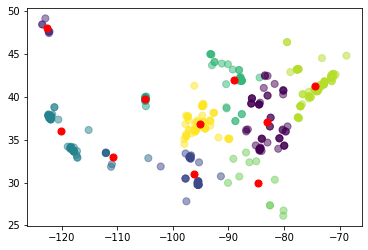

In [87]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='random', n_clusters=10, random_state=2).fit(tmp_df[['Lon','Lat']])
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(tmp_df['Lon'], tmp_df['Lat'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [89]:
tmp_df['label'] = kmeans.labels_

C:\Users\fried_egg_\Anaconda3\envs\dummy\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
tmp_df

,Lat,Lon,Name,Company,Position,label
2,36.062145,-95.965279,Paul Morgan,Juniper Networks,[Factory Layout Engineer],9
3,34.191977,-118.919964,Charles Brown,Amgen Inc,[Chemical Equipment Operator],4
5,32.949110,-96.833311,Cecil Raines,Qorvo,[Clinical Psychologist],2
7,27.335148,-82.539090,William Sherwood,PNC Financial Services,[Building Inspector],7
8,41.036057,-83.649210,Freddie Gaylord,Marathon Petroleum,[Medical Records Technician],0
...,...,...,...,...,...,...
495,36.148502,-95.990513,Elizabeth Sanderson,Occidental Petroleum,[Makeup Artist],9
496,38.908686,-94.785945,Giovanna Neal,Allegion,[Fitness Trainer],9
497,32.784426,-96.800251,Eva Jones,Willis Towers Watson,[Community Organization Worker],2
498,35.095585,-89.990382,Kimberly Harrison,Kellogg Co.,[Quality Control Engineer],9


In [91]:
folium_color = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

In [94]:
tmp_string = list(tmp_df['Name'])[i]

for i in range(len(tmp_df)):
    folium.Marker(
      location=[list(tmp_df['Lat'])[i], list(tmp_df['Lon'])[i]],
      popup=list(tmp_df['Name'])[i],
      icon=folium.Icon(color=folium_color[list(tmp_df['label'])[i]],icon='star')
    ).add_to(m)

In [95]:
m

In [97]:
tmp_df[tmp_df['label'] == 1]

,Lat,Lon,Name,Company,Position,label
113,47.614063,-122.196682,Jesse Johnson,eBay Inc.,[Medical Technologist],1
323,48.442581,-123.513178,Jean Meredith,KeyCorp,[Child Care Worker],1
335,48.442581,-123.513178,Joseph Stewart,KeyCorp,[Orthodontist],1
353,47.428908,-122.294164,Nancy Hawkins,Alaska Air Group Inc,[Commercial Fisherman],1
358,49.149117,-122.948333,Dennis Brown,Ryder System,[Advertising Agency Coordinator],1
368,47.581055,-122.335277,Judy Rosa,Starbucks Corp.,[Video Engineer],1
474,47.622348,-122.363300,Efrain Hebel,F5 Networks,[Hospital Nurse],1
